# Approximate sampling distributions


In [9]:
# Importing pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
import itertools
attrition = pd.read_feather("../datasets/attrition.feather")
spotify = pd.read_feather("../datasets/spotify_2000_2020.feather")
coffee_ratings = pd.read_feather("../datasets/coffee_ratings_full.feather")


In [10]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())


In [11]:

dice = expand_grid(
    {'die1': [1, 2, 3, 4, 5, 6],
     'die2': [1, 2, 3, 4, 5, 6],
     'die3': [1, 2, 3, 4, 5, 6],
     'die4': [1, 2, 3, 4, 5, 6]
    }
    )

In [12]:
dice

,die1,die2,die3,die4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
...,...,...,...,...
1291,6,6,6,2
1292,6,6,6,3
1293,6,6,6,4
1294,6,6,6,5


In [13]:
dice['mean_roll'] = (dice['die1'] +
dice['die2'] +
dice['die3'] +
dice['die4']) / 4
print(dice)

      die1  die2  die3  die4  mean_roll
0        1     1     1     1       1.00
1        1     1     1     2       1.25
2        1     1     1     3       1.50
3        1     1     1     4       1.75
4        1     1     1     5       2.00
...    ...   ...   ...   ...        ...
1291     6     6     6     2       5.00
1292     6     6     6     3       5.25
1293     6     6     6     4       5.50
1294     6     6     6     5       5.75
1295     6     6     6     6       6.00

[1296 rows x 5 columns]


<AxesSubplot:>

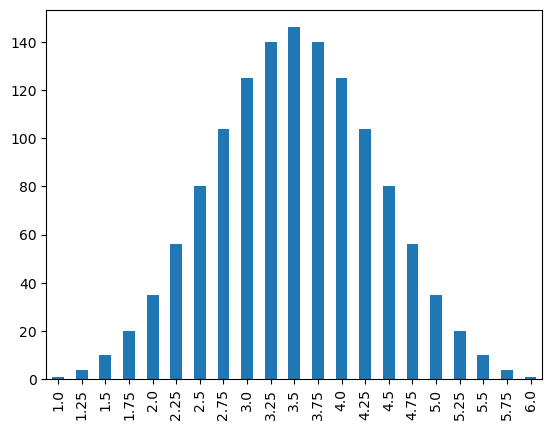

In [14]:
dice['mean_roll'] = dice['mean_roll'].astype('category')
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")

## Exact sampling distribution


In [15]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Print the result
print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


In [16]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


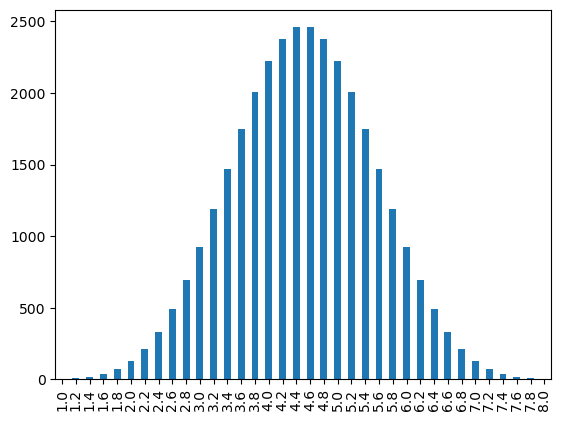

In [17]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")
plt.show()

## Generating an approximate sampling distribution


In [18]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())


3.4


In [ ]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Print the first 10 entries of the result
print(sample_means_1000[0:10])